In [1]:
__author__ = "Luke Rhinehart"
__version__ = "Fall 2023"
__pylint__ = "Version 3.11.4"

#Github repo is at https://github.com/0000LRhinehart/Project-2-Data-Analytics

In [1]:
'''Part 1
   Dataset Overview'''

# The dataset is sourced from https://www.kaggle.com/datasets/adityakadiwal/water-potability

# What trends exist on whether water is potable or not and what factors will affect the likelyhood water is not safe?

# The data contains 10 columns and 3276 rows
# It features information about the chemical components of various sources of water.
# Its collumns contain data on the water's pH, hardness, amount of solids in the water, the amount of chloramines,
# the amount of sulfates, the conductivity,  the amount of organic carbon, the amount of trihalomethanes,
# the turpidity and the potablility

# The target variable is Potability which has a 1 if the water is potable and a 0 if the water is impotable 

# The goal is to determine what factor or factors are seen most in potable and unpotable sources of water.

'Part 1\n   Dataset Overview'

In [2]:
'''Part 2
   load data and import'''
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('water_potability.csv',)

display(df)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
'''Part 2 
   Check for Null Values'''

print(df.isnull().sum())

df_dropnull = df.dropna()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


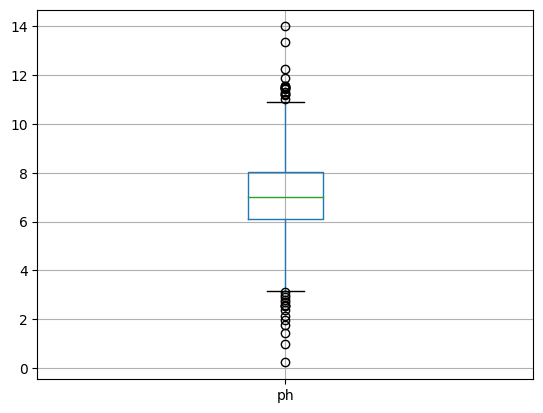

<Axes: >

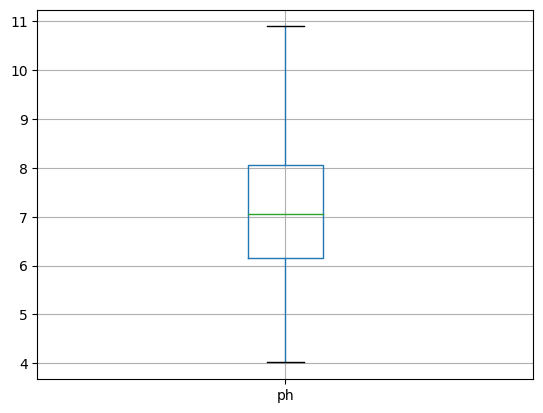

In [4]:
'''Part 2
   data cleaning: Boxplots 
   Checking for outliers'''


df_dropnull.boxplot(column=['ph'])
plt.show()

df_ph_nooutlier = df_dropnull[(df_dropnull['ph'] < 10.9 ) & (df_dropnull['ph'] > 4 )]

df_ph_nooutlier.boxplot(column=['ph'])

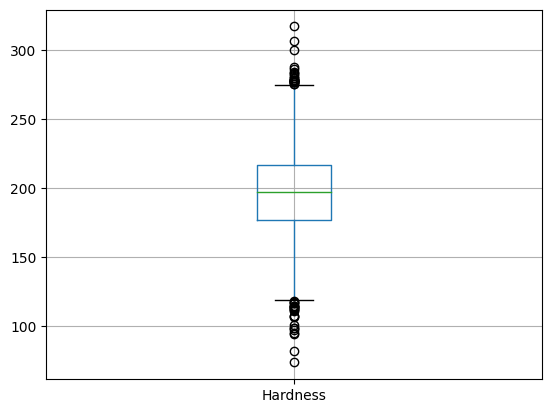

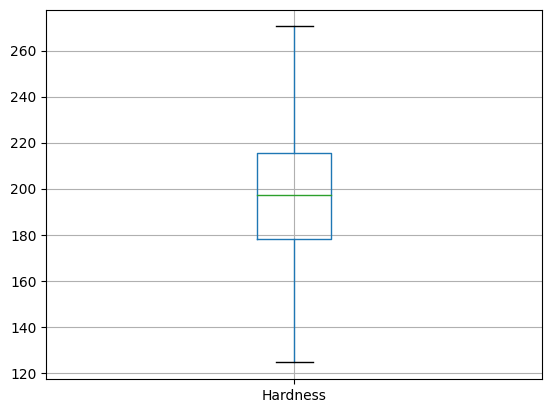

In [5]:
df_ph_nooutlier.boxplot(column=['Hardness'])
plt.show()

df_hardness_nooutlier = df_ph_nooutlier[(df_ph_nooutlier['Hardness'] < 271 ) & (df_ph_nooutlier['Hardness'] > 124 )]

df_hardness_nooutlier.boxplot(column=['Hardness'])
plt.show()

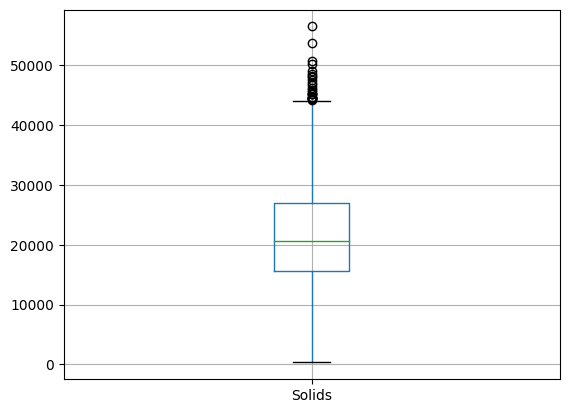

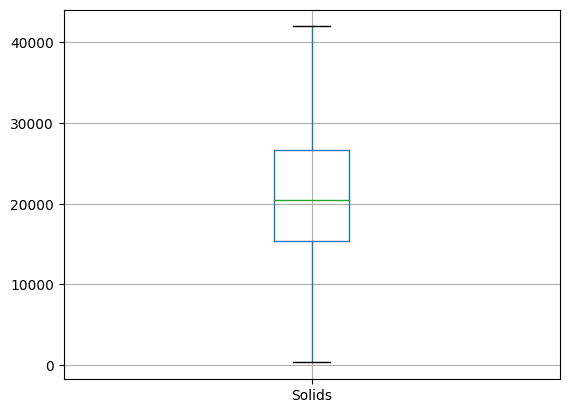

In [6]:
df_hardness_nooutlier.boxplot(column=['Solids'])
plt.show()

df_solid_nooutlier = df_hardness_nooutlier[(df_hardness_nooutlier['Solids'] < 42000 )]

df_solid_nooutlier.boxplot(column=['Solids'])
plt.show()

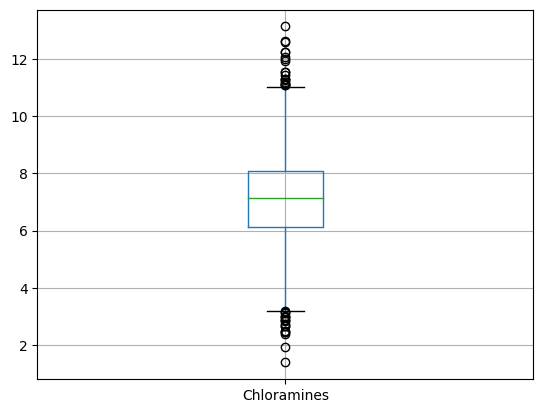

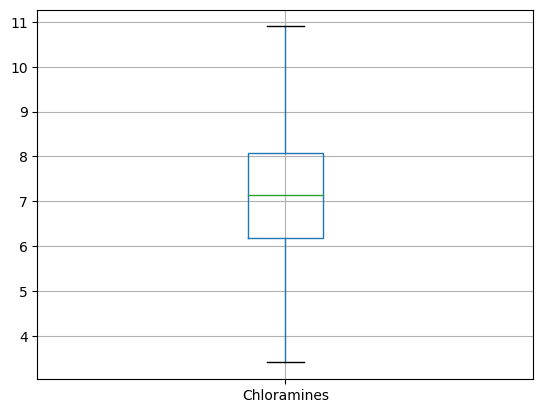

In [7]:
df_solid_nooutlier.boxplot(column=['Chloramines'])
plt.show()

df_chloramine_nooutlier = df_solid_nooutlier[(df_solid_nooutlier['Chloramines'] < 10.9 ) & (df_solid_nooutlier['Chloramines'] > 3.4 )]

df_chloramine_nooutlier.boxplot(column=['Chloramines'])
plt.show()

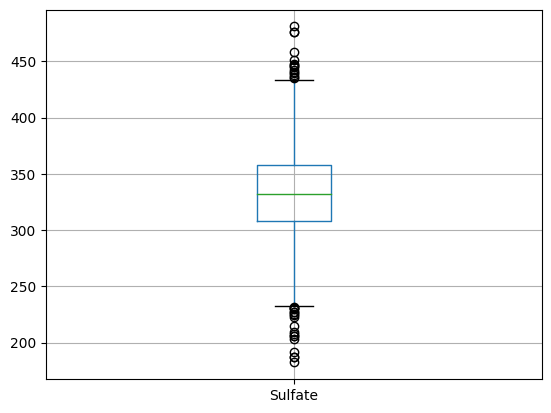

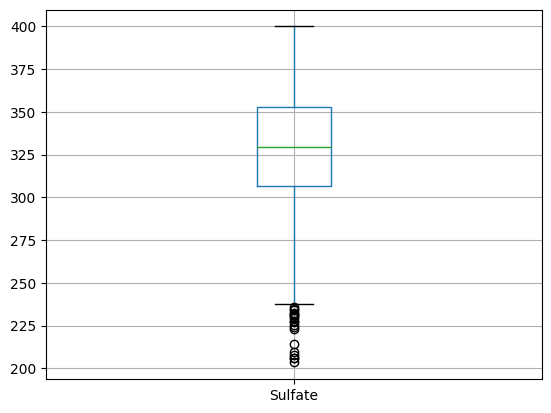

In [8]:
df_solid_nooutlier.boxplot(column=['Sulfate'])
plt.show()

df_sulfate_nooutlier = df_solid_nooutlier[(df_solid_nooutlier['Sulfate'] < 400 ) & (df_solid_nooutlier['Sulfate'] > 200 )]

df_sulfate_nooutlier.boxplot(column=['Sulfate'])
plt.show()

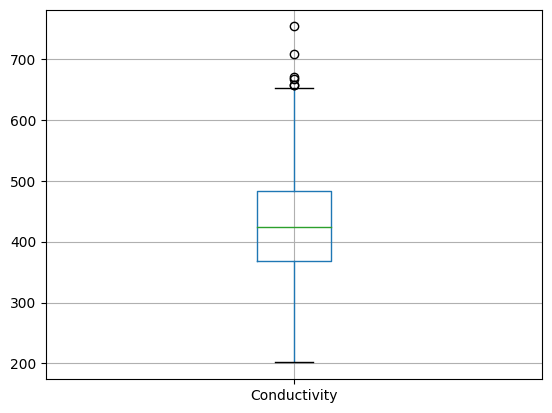

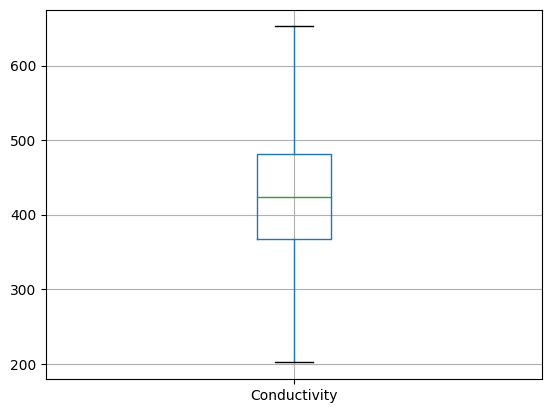

In [9]:
df_sulfate_nooutlier.boxplot(column=['Conductivity'])
plt.show()

df_conductivity_nooutlier = df_sulfate_nooutlier[(df_sulfate_nooutlier['Conductivity'] < 655  )]

df_conductivity_nooutlier.boxplot(column=['Conductivity'])
plt.show()

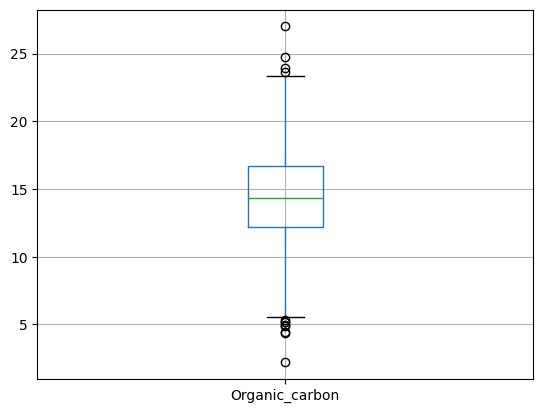

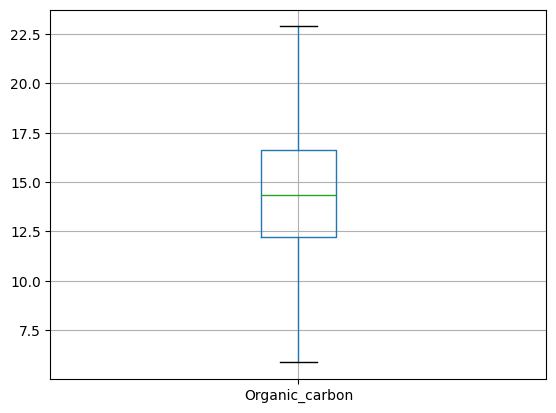

In [10]:
df_conductivity_nooutlier.boxplot(column=['Organic_carbon'])
plt.show()

df_carbon_nooutlier = df_conductivity_nooutlier[(df_conductivity_nooutlier['Organic_carbon'] < 23 ) & (df_conductivity_nooutlier['Organic_carbon'] > 5.6 )]

df_carbon_nooutlier.boxplot(column=['Organic_carbon'])
plt.show()

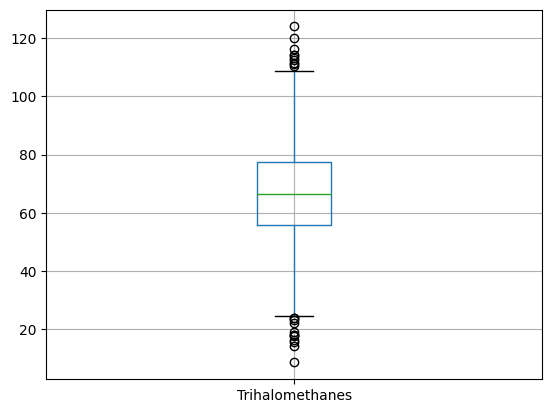

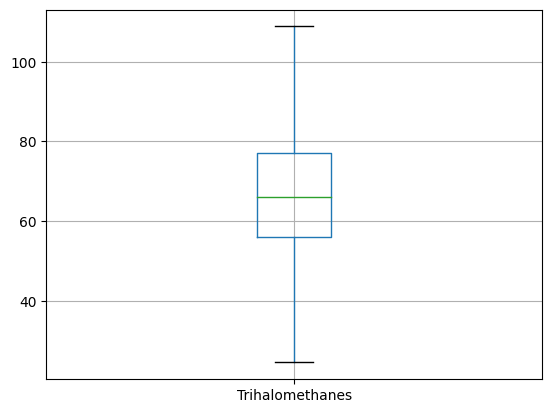

In [11]:
df_dropnull.boxplot(column=['Trihalomethanes'])
plt.show()

df_trihalomethane_nooutlier = df_carbon_nooutlier[(df_carbon_nooutlier['Trihalomethanes'] < 110 ) & (df_carbon_nooutlier['Trihalomethanes'] > 24 )]

df_trihalomethane_nooutlier.boxplot(column=['Trihalomethanes'])
plt.show()

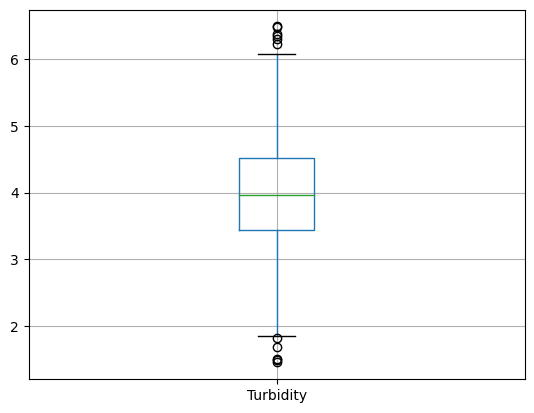

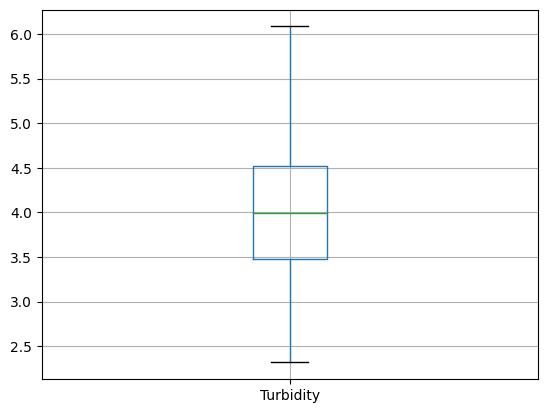

In [12]:
df_dropnull.boxplot(column=['Turbidity'])
plt.show()

df_nooutlier_final = df_trihalomethane_nooutlier[(df_trihalomethane_nooutlier['Turbidity'] < 6.2 ) & (df_trihalomethane_nooutlier['Turbidity'] > 2.3 )]

df_nooutlier_final.boxplot(column=['Turbidity'])
plt.show()

In [13]:
'''Part 3
   Feature Engineering 
   Categorical Features vs. Target -
   Grouped Bar Chart or Stacked Bar Chart'''

# The are no catagorical elements in this database
# These steps have been preserved for posterity's sake


'Part 3\n   Feature Engineering \n   Categorical Features vs. Target -\n   Grouped Bar Chart or Stacked Bar Chart'

In [14]:
'''Part 3
   ANOVA'''
from sklearn.feature_selection import SelectKBest, f_classif, chi2

x = df_nooutlier_final.loc[:, ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y = df_nooutlier_final.loc[:, 'Potability']

fs = SelectKBest(score_func=f_classif, k='all') # call the method
bestFeatures = fs.fit(x, y) # train the model
np.set_printoptions(suppress = True)
print(bestFeatures.scores_) # print out the scores
print(bestFeatures.pvalues_)

#The p-values of ph, Hardness, Conductivity, Organic_carbon,Trihalomethanes, and Turbidity are significantly high and their f scores are similiarly high. They will be dropped

df_drop_p = df_nooutlier_final.drop(columns=['ph','Hardness','Chloramines','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])

[0.82167642 0.07891245 7.29835871 0.80814142 3.57698047 0.41034762
 0.07905611 0.2438204  0.83189592]
[0.36482267 0.77881185 0.00697234 0.36880132 0.05876035 0.52188196
 0.77861585 0.62152598 0.36185795]


In [15]:
'''Part 3
   Chi Squared'''

# The are no catagorical elements in this database
# These steps have been preserved for posterity's sake


'Part 3\n   Chi Squared'

In [16]:
'''Part 3
   Correlation Coefficients
   of all values'''
print(df_nooutlier_final.drop(columns='Potability').corr())

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.153969 -0.082022    -0.039269  0.021055   
Hardness         0.153969  1.000000 -0.028199    -0.056658 -0.067519   
Solids          -0.082022 -0.028199  1.000000    -0.032645 -0.142940   
Chloramines     -0.039269 -0.056658 -0.032645     1.000000  0.026515   
Sulfate          0.021055 -0.067519 -0.142940     0.026515  1.000000   
Conductivity    -0.015271  0.009426 -0.009627    -0.039445  0.008625   
Organic_carbon   0.009951  0.021087  0.020758    -0.011876 -0.024714   
Trihalomethanes  0.017743 -0.019141 -0.016486     0.013192 -0.023933   
Turbidity       -0.049928 -0.020351  0.013255     0.028273 -0.032882   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                  -0.015271        0.009951         0.017743  -0.049928  
Hardness             0.009426        0.021087        -0.019141  -0.020351  
Solids              -0.009627        0.020758      

In [17]:
'''Part 3
   Correlation Coefficients of undropped values
   and final observations'''

print(df_drop_p.corr())

# The Remaining values have little correlation between each other


              Solids   Sulfate  Potability
Solids      1.000000 -0.142940    0.066321
Sulfate    -0.142940  1.000000   -0.046482
Potability  0.066321 -0.046482    1.000000


In [18]:
'''Part 3
   Feature Scaling'''
x_final = df_drop_p.loc[:, ['Solids','Sulfate']]

from sklearn.preprocessing import MinMaxScaler

nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final)


In [19]:
'''Part 4
   Test Train Split'''
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=60, stratify=y)

In [31]:
'''Part 4
   Data Balancing'''

#Data balancing is not needed as the cross validation model accounts for imbalanced datasets



'Part 4\n   Data Balancing'

In [30]:
'''Part 4
   Generate Accuracy Score'''

# Due to the target variable being a binary value this will use a cross validation model to test the accuracy of the result

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

classifier= KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.5709969788519638

In [24]:
'''Part 4
   k values'''

k_values = [] # create a list to store the k-values

for i in range(1, 30):
    if i%2 !=0:
        k_values.append(i)
    
print(k_values)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


       k  accuracy
0    1.0  0.525991
1    3.0  0.542326
2    5.0  0.554370
3    7.0  0.565871
4    9.0  0.580960
5   11.0  0.589434
6   13.0  0.591833
7   15.0  0.584571
8   17.0  0.580978
9   19.0  0.588222
10  21.0  0.594874
11  23.0  0.603315
12  25.0  0.611782
13  27.0  0.608770
14  29.0  0.606962


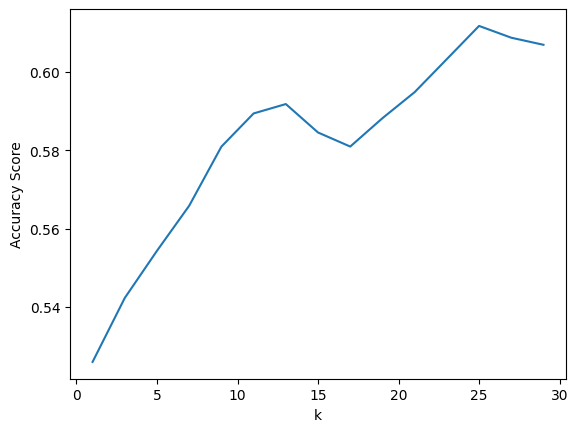

In [25]:
'''Part 4
   optimal k scores using cross validation'''
from sklearn.model_selection import cross_val_score

k_accuracy_scores = [] # use this list to save the accuracy scores.

for k in k_values: # use a loop to iterate the k values.
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean())



# use a DataFrame to save k-values vs. each accuracy score.
df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy'])

print(df_k_scores)

# The optimal K score here is 25

plt.plot(k_values, k_accuracy_scores)
plt.xlabel("k")
plt.ylabel("Accuracy Score")
plt.show()